 # Guided project: Exploring Popular Data Science questions on Stack Exchange
 
 
 ### Introduction
 
 **What is it that people want to learn about in data science?**
 
 Stack Overflow is part of a question and answer website network called [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange). [Community of Data science experts](https://datascience.stackexchange.com/)
 
 
 Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.


Good answers are voted up and rise to the top.

The best answers show up first so that they are always easy to find.

The person who asked can mark one answer as "accepted".

Accepting doesn't mean it's the best answer, it just means that it worked for the person who asked.
Focused on answers to specific actual problems, not discussions

All questions are tagged with their subject areas. Each can have up to 5 tags, since a question might be related to several subjects.
Click any tag to see a list of questions with that tag, or go to the tag list to browse for topics that interest you.

Upvotes unlock new privileges up to access to moderation tools
Badges are special achievements you earn for participating on the site. They come in three levels: bronze, silver, and gold.


[Data Science Stack Exchange data model](https://i.stack.imgur.com/AyIkW.png)


Help section of  Stack Exchange Data Explorer (SEDE) is [here](https://data.stackexchange.com/help)

Most promising tables are Posts, Tags, followed by Votes, Users and Comments.

The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

 - `Id`: An identification number for the post.
 - `PostTypeId`: An identification number for the type of post.
 - `СreationDate`: The date and time of creation of the post.
 - `Score`: The post's score.
 - `ViewCount`: How many times the post was viewed.
 - `Tags`: What tags were used.
 - `AnswerCount`: How many answers the question got (only applicable to question posts).
 - `FavoriteCount`: How many times the question was favored (only applicable to question posts).

SELECT Id, 
       PostTypeId,
       CreationDate
       Score, 
       ViewCount, 
       Tags, 
       AnswerCount, 
       FavoriteCount
FROM Posts
WHERE CreationDate >= '2019-01-01 00:00:00' AND PostTypeId = 1;

The resulting csv file was saved as 'recent_questions.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
%matplotlib inline

In [2]:
posts = pd.read_csv('recent_questions.csv')

In [3]:
posts.info()
posts.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16341 entries, 0 to 16340
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             16341 non-null  int64  
 1   PostTypeId     16341 non-null  int64  
 2   CreationDate   16341 non-null  object 
 3   Score          16341 non-null  int64  
 4   ViewCount      16341 non-null  int64  
 5   Tags           16341 non-null  object 
 6   AnswerCount    16341 non-null  int64  
 7   FavoriteCount  2794 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1021.4+ KB


,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,48764,1,2019-04-06 17:15:13,1,2456,<classification><keras><lstm><binary><neural>,0,1.0


In [4]:
posts['FavoriteCount'].value_counts(dropna=False)

NaN     13547
1.0      1889
2.0       381
0.0       291
3.0       102
4.0        48
5.0        30
6.0        21
7.0        11
8.0         6
9.0         3
14.0        3
12.0        2
10.0        2
26.0        1
11.0        1
15.0        1
17.0        1
13.0        1
Name: FavoriteCount, dtype: int64

## Next steps in data preparation
- column `CreationDate` should be converted to datetime format
- column `FavoriteCount` should be converted to integer format
- column `Tags` should be converted to strings separated by `,`
- missing values in the column `FavoriteCounts` which are dominant can not be simply deleted, probably they could be replaces with 0

In [5]:
posts = posts.fillna(0)

In [6]:
posts['FavoriteCount'] = posts['FavoriteCount'].astype(int)

In [7]:
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])

In [8]:
posts['Tags'] = posts['Tags'].str.replace('><', ',').str.replace('<', '').str.replace('>', '').str.split(',')

## Identify the most used and most viewed tags

In [9]:
tags = {}
def count_tags(lst):
    for e in lst:
        if e in tags:
            tags[e] += 1
        else:
            tags[e] = 1
    return tags
posts['Tags'].apply(count_tags)

eval_tags = pd.DataFrame.from_dict(tags, orient='index', columns=['used'])
eval_tags = eval_tags.sort_values(by = ['used'], ascending=False)
eval_tags.head(10)

,used
machine-learning,4905
python,3240
deep-learning,2251
neural-network,1883
keras,1551
classification,1406
tensorflow,1155
scikit-learn,1076
nlp,1034
time-series,843


In [10]:
# create a list of tags
tags = eval_tags.index
print(tags)

Index(['machine-learning', 'python', 'deep-learning', 'neural-network',
       'keras', 'classification', 'tensorflow', 'scikit-learn', 'nlp',
       'time-series',
       ...
       'truncation-decision-trees', 'two-step', 'tensorboard', 'consumerweb',
       'intuition', 'feature-interaction', 'tpu', 'perplexity', 'levene',
       'partial-dependence-plot'],
      dtype='object', length=627)


In [11]:
#eval_tags.insert(loc=1, column='Views', value=['' for i in range(eval_tags.shape[0])])


In [12]:
eval_tags['views'] = ''
eval_tags['scores'] = ''
eval_tags['favorites'] = ''
#eval_tags.insert(loc=2, column='Scores', value=['' for i in range(eval_tags.shape[0])])

In [13]:
# count views
for tag in tags:
    mask = posts['Tags'].map(set([tag]).issubset)
    eval_tags.loc[tag, 'views'] = posts[mask]['ViewCount'].sum()
    eval_tags.loc[tag, 'scores'] = posts[mask]['Score'].sum()
    eval_tags.loc[tag, 'favorites'] = posts[mask]['FavoriteCount'].sum()
    
eval_tags.head(10)

,used,views,scores,favorites
machine-learning,4905,1826874,5992,1263
python,3240,2627002,3405,703
deep-learning,2251,992269,2674,603
neural-network,1883,845239,2328,495
keras,1551,1173629,1801,408
classification,1406,503634,1718,334
tensorflow,1155,653429,1138,211
scikit-learn,1076,686842,1268,248
nlp,1034,407049,1328,274
time-series,843,285699,874,187


In [14]:
eval_tags.index.to_series()

machine-learning                  machine-learning
python                                      python
deep-learning                        deep-learning
neural-network                      neural-network
keras                                        keras
                                    ...           
feature-interaction            feature-interaction
tpu                                            tpu
perplexity                              perplexity
levene                                      levene
partial-dependence-plot    partial-dependence-plot
Length: 627, dtype: object

In [15]:
eval_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, machine-learning to partial-dependence-plot
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   used       627 non-null    int64 
 1   views      627 non-null    object
 2   scores     627 non-null    object
 3   favorites  627 non-null    object
dtypes: int64(1), object(3)
memory usage: 40.7+ KB


In [16]:
eval_tags = eval_tags.astype('int64')

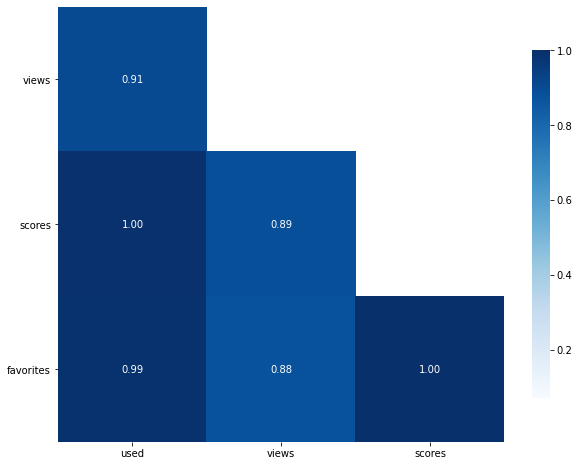

In [41]:
# create correlation matrix
correlations = eval_tags.corr()

fig, ax = plt.subplots(figsize=(10, 8))

# create mask with half of the matrix
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# adjust mask and dataframe deleting the main diagonal row
mask = mask[1:, :-1]
corr = correlations.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='Blues',
           vmin=0.07, vmax=1, cbar_kws={'shrink': .8})
# yticks
plt.yticks(rotation=0)
plt.show()

All of dimensions show strong correlation with each other, scores (upvotes-downvotes) correlate strongest to favorites and number of times the tag was used. Views correlate less to other dimensions but still with significant coefficients (0.88 -0.91). Let's see detailed way top tags for every dimension.

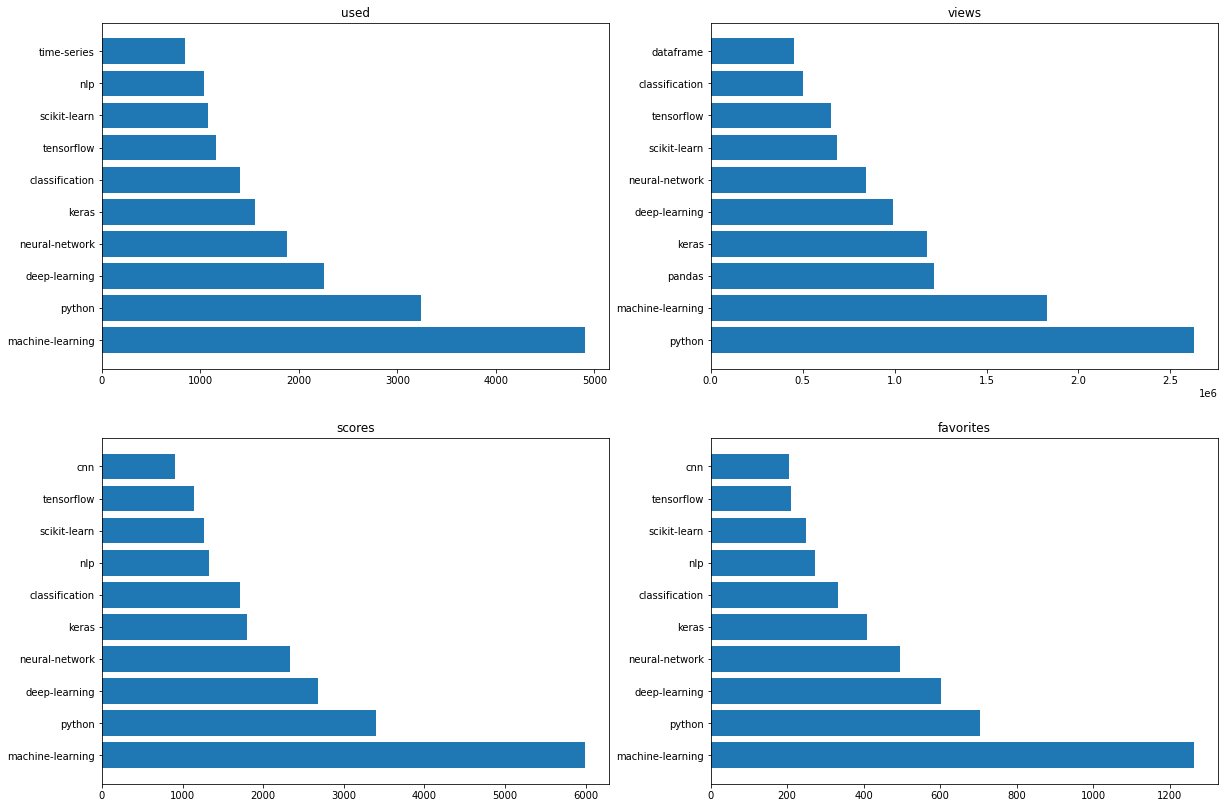

In [17]:
fig = plt.figure(figsize=(20, 14))
for sp in range(4):
    ax = fig.add_subplot(2, 2, sp+1)
    data = eval_tags.sort_values(by=eval_tags.columns[sp], ascending=False)
    data = data.iloc[:10]
    col = data.columns[sp]
    index = data.index.to_series()
    ax.barh(index, data[col])
    ax.set_title(col)

In [18]:
top_10_used = eval_tags.sort_values(by=['used'], ascending=False).head(10).index.to_list()
used_set = set(top_10_used)

In [19]:
top_10_viewed = eval_tags.sort_values(by=['views'], ascending=False).head(10).index.to_list()
viewed_set = set(top_10_viewed)

In [20]:
not_in_viewed = used_set - viewed_set
print(not_in_viewed)

{'nlp', 'time-series'}


In [21]:
not_in_used = viewed_set - used_set
print(not_in_used)

{'dataframe', 'pandas'}


In [22]:
top_tags = list(used_set.intersection(viewed_set))
print(top_tags)

['machine-learning', 'tensorflow', 'classification', 'scikit-learn', 'neural-network', 'python', 'deep-learning', 'keras']


[Tags](https://datascience.stackexchange.com/tags) page of Data Science StackExchange provided descriptions of tags. 

- Keras is an open-source software library that provides a Python interface for [deep learning](https://keras.io/about/). Keras acts as an interface for the TensorFlow library.

 - Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms. Scikit-learn is one of the most popular machine learning libraries on [GitHub](https://en.wikipedia.org/wiki/Scikit-learn). SciKit learn is more general Machine Learning.
 
 - Neural-network Artificial neural networks (ANN), are composed of 'neurons' - programming constructs that mimic the properties of biological neurons. A set of weighted connections between the neurons allows information to propagate through the network to solve artificial intelligence problems without the network designer having had a model of a real system.
 
 - Classification in the [Data Science](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623#:~:text=Classification%20is%20the%20process%20of,discrete%20output%20variables%20(y).) is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).
 
 - TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. Tensorflow is typically used more in Deep Learning and Neural Networks.
 
 - Deep-learning - a new area of Machine Learning research concerned with the technologies used for learning hierarchical representations of data, mainly done with deep neural networks (i.e. networks with two or more hidden layers), but also with some sort of Probabilistic Graphical Models.
 
 - Machine Learning is a subfield of computer science that draws on elements from algorithmic analysis, computational statistics, mathematics, optimization, etc. It is mainly concerned with the use of data to construct models that have high predictive/forecasting ability. Topics include modeling building, applications, theory, etc.

The most common tags are Python and Machine Learning, other top tags could be roughly divided to 2 groups: 
- deep learning tools like TensorFlow, Keras to work with neural networks.
- more common machine learning applications working with structured data (includes classification and Scikit-learn.
Following growing popularity of the deep-learning and tools for it I would like to find out which tags are most often associated with 

## Deep learning

Following [Tag info page at Data Science StackExchange](https://datascience.stackexchange.com/tags/deep-learning/info):

Deep Learning is an area of machine-learning which attempts to build neural-networks to learn complex functions by using special architectures composed of many layers (hence the term "deep").

Deep architectures allow more complex tasks to be learned because, in addition to these neural networks having more layers to perform transformations, the larger number of layers and more complex architectures of the neural network allow a hierarchical organization of functionality to emerge.

Deep Learning was introduced into machine learning research with the intention of moving machine learning closer to artificial intelligence. A significant impact of deep learning lies in feature learning, mitigating much of the effort going into manual feature engineering in non-deep learning neural networks.

In [23]:
d_l_mask = posts['Tags'].str.contains('deep-learning', regex=False)
d_l_tags = posts.loc[d_l_mask, 'Tags']
d_l_tags.head()

3           [python, deep-learning, convolution, numpy]
23    [machine-learning, deep-learning, predictive-m...
24    [machine-learning, neural-network, deep-learni...
27    [deep-learning, classification, keras, convolu...
39    [deep-learning, computer-vision, image-segment...
Name: Tags, dtype: object

In [24]:
d_l_list = d_l_tags.to_list()
print(len(d_l_list))

2251


In [25]:
associated_tags = {}
for line in d_l_list:
    for x in line:
        if x in associated_tags:
            associated_tags[x] += 1
        else:
            associated_tags[x] = 1

tags = sorted(associated_tags.items(), key=lambda x:x[1], reverse=True)[1:21]
for x in tags:
    print(x)
    
d_l_tags_list = [x[0] for x in tags][1:]

('machine-learning', 854)
('neural-network', 585)
('keras', 422)
('tensorflow', 295)
('cnn', 290)
('python', 261)
('lstm', 174)
('nlp', 147)
('classification', 127)
('computer-vision', 113)
('image-classification', 112)
('time-series', 96)
('pytorch', 86)
('convolutional-neural-network', 82)
('rnn', 77)
('convolution', 69)
('reinforcement-learning', 69)
('object-detection', 65)
('loss-function', 62)
('dataset', 59)


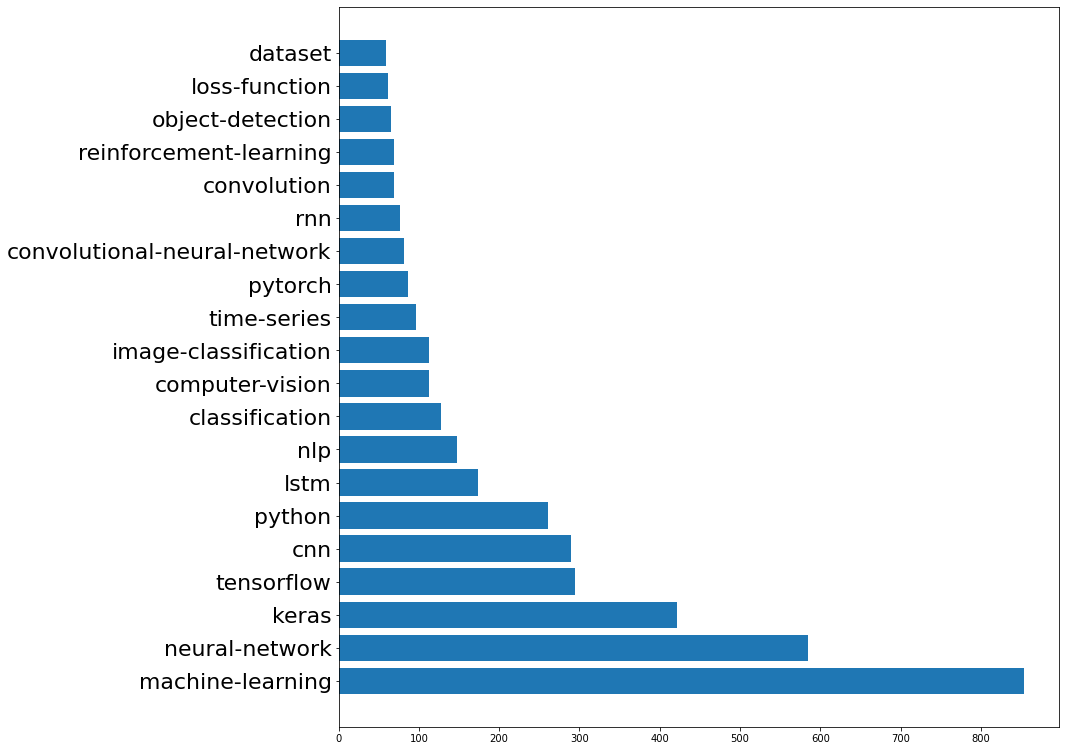

In [26]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0,0,1,1])
langs = [val[1] for val in tags]
students = [val[0] for val in tags]
plt.yticks(fontsize=22)
ax.barh(students, langs)
plt.show()

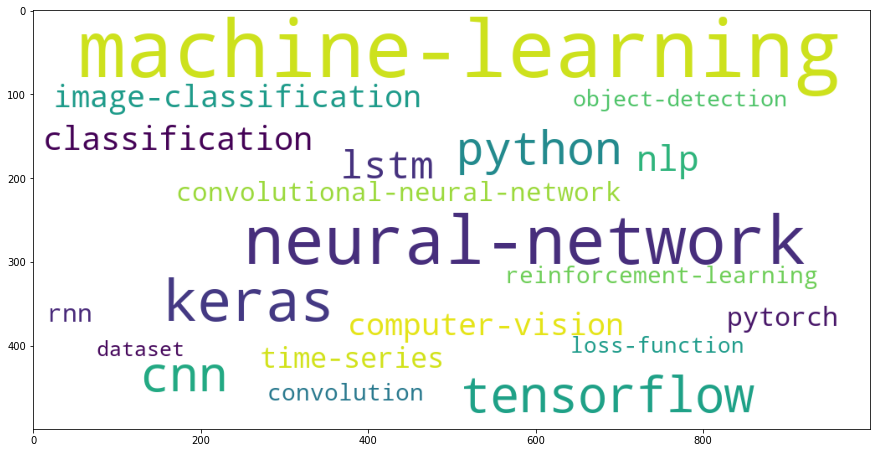

In [27]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(dict(tags))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

 A number of tools and neural network architectures used primarily for computer vision and natural speech processing.
 The interest to deep-learning is strong but is that trend long-running?
 To answer this question I will make a second SQL query to SEDE having the following syntax:
 SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
 
 In this we will track the interest in deep learning across time. We will:

 - Count how many deep learning questions are asked per time period.
 - The total amount of questions per time period.
 - How many deep learning questions there are relative to the total amount of questions per time period.

In [28]:
all = pd.read_csv('all_questions.csv')
all['CreationDate'] = pd.to_datetime(all['CreationDate'])
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28543 entries, 0 to 28542
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            28543 non-null  int64         
 1   CreationDate  28543 non-null  datetime64[ns]
 2   Tags          28543 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 669.1+ KB


In [29]:
all_by_month = all.set_index('CreationDate').groupby(pd.Grouper(freq='Q')).count()
all_by_month.drop(columns=['Tags'], inplace=True)
all_by_month.rename(columns={'Id':'all posts'}, inplace=True)

In [30]:
all_by_month.head()

,all posts
CreationDate,
2014-06-30,157
2014-09-30,188
2014-12-31,214
2015-03-31,188
2015-06-30,284


In [31]:
d_l_mask = all['Tags'].str.contains('deep-learning', regex=False)
d_l = all[d_l_mask]
d_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3803 entries, 9 to 28538
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            3803 non-null   int64         
 1   CreationDate  3803 non-null   datetime64[ns]
 2   Tags          3803 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 118.8+ KB


In [32]:
for i in d_l_tags_list:
    mask = all['Tags'].str.contains(i, regex=False)
    df = all[mask]
    all_d_l = pd.concat([d_l,df]).drop_duplicates().reset_index(drop=True)

In [33]:
d_l_by_month = all_d_l.set_index('CreationDate').groupby(pd.Grouper(freq='Q')).count()
d_l_by_month.drop(columns=['Tags'], inplace=True)
d_l_by_month.rename(columns={'Id':'d_l posts'}, inplace=True)

In [34]:
all_by_month = all_by_month.join(d_l_by_month)

In [35]:
all_by_month.dropna(inplace=True)

Text(0.5, 1.0, 'Total vs deep learning posts')

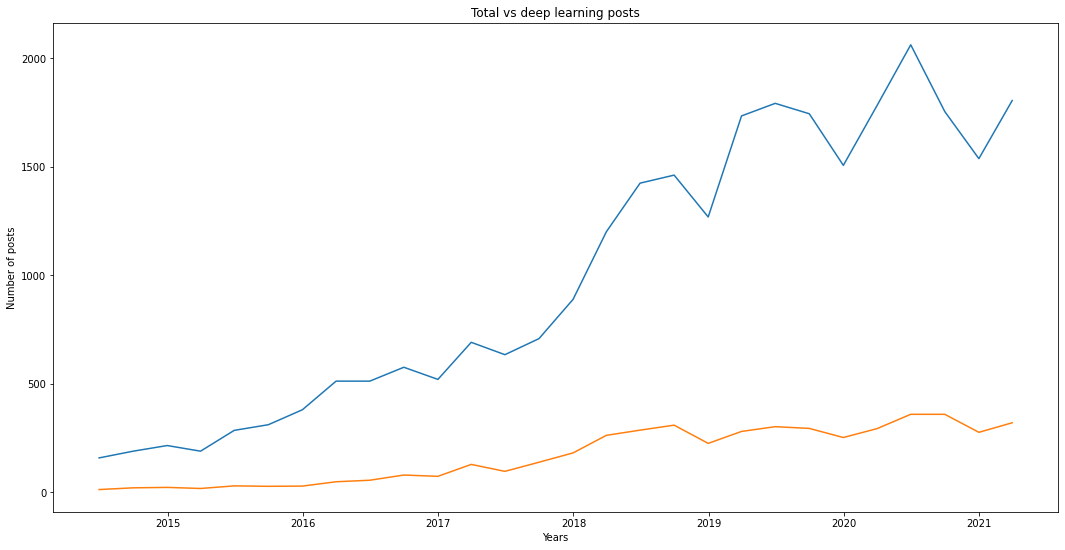

In [36]:
plt.rcParams["figure.figsize"] = (18,9)
plt.plot(all_by_month.iloc[:-1, ])
plt.xlabel('Years')
plt.ylabel('Number of posts')
plt.title('Total vs deep learning posts')

In [37]:
all_by_month['d_l share'] = (all_by_month['d_l posts'] / all_by_month['all posts'])*100
all_by_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2014-06-30 to 2021-06-30
Freq: Q-DEC
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   all posts  29 non-null     int64  
 1   d_l posts  29 non-null     int64  
 2   d_l share  29 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 928.0 bytes


Text(0.5, 1.0, 'Share of deep learning posts')

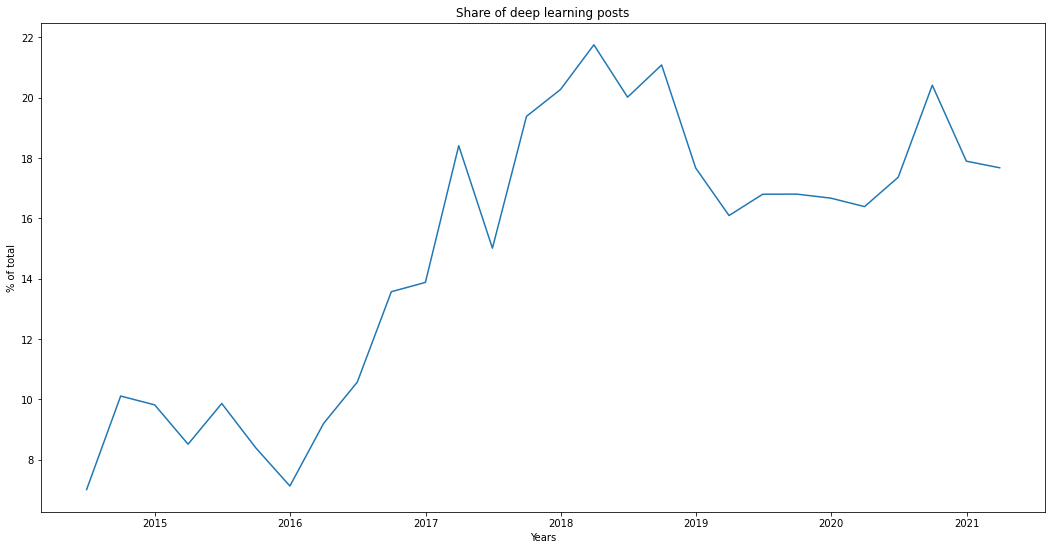

In [38]:
plt.rcParams["figure.figsize"] = (18,9)
plt.plot(all_by_month.iloc[:-1, 2])
plt.xlabel('Years')
plt.ylabel('% of total')
plt.title('Share of deep learning posts')

Clear increase in share of questions connected to deep learning technologies. My recommendation will be to chose topics connected to natural speech processing and computer vision.


In [39]:
math_answers = pd.read_csv('math_recent_questions.csv')
math_answers.head()

,Id,PostTypeId,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,3481728,1,2019-12-19 11:26:00,68,<general-topology><algebraic-topology><coverin...,1,0.0
1,3481729,1,2019-12-19 11:27:23,40,<binomial-theorem><binomial-distribution>,2,NaN
2,3481730,1,2019-12-19 11:27:57,43,<general-topology><topological-vector-spaces>,1,NaN
3,3481733,1,2019-12-19 11:29:47,24,<real-analysis><analysis>,0,NaN
4,3481734,1,2019-12-19 11:31:00,157,<linear-algebra><matrices><spectral-theory><sv...,2,1.0


In [45]:

math_answers['Tags'] = math_answers['Tags'].str.replace('><', ',').str.replace('<', '').str.replace('>', '').str.split(',')

tags = {}

math_answers['Tags'].apply(count_tags)

math_tags = pd.DataFrame.from_dict(tags, orient='index', columns=['used'])
math_tags = math_tags.sort_values(by = ['used'], ascending=False)
math_tags.head(10)

,used
real-analysis,4788
linear-algebra,3900
calculus,3837
probability,3394
abstract-algebra,2601
integration,2264
sequences-and-series,1992
matrices,1794
combinatorics,1781
functional-analysis,1668


 The first term 'real analysis' is very common (as python fir Data Science Stack Exchange). Most of machine learning is built upon three pillars: linear algebra , calculus , and probability theory [The roadmap of Mathematics for Deep Learning](https://towardsdatascience.com/the-roadmap-of-mathematics-for-deep-learning-357b3db8569b).
 These tags were also extensively used at Matematics Stack Exchange. That could also be a good idea to prepare learning materials for these 